## **Introduction**

Gapminder dataset explains about GDP per capita as a measure of average income per person in a country. This dataset contain information about population, life expectancy, and gdp percapita from 1952 till 2007 for each country. In this project we are going use python to address certain questions.

Variables used in this dataset is:

**1: country** = Country 

**2: year** = Data collected year

**3: population** = Population of each country

**4: continent** = Continent where country is located

**5: life_exp** = Life expectency at birth

**6: gdp_cap** = GDP per capita

### **Dataset explanation**

Before moving to any dataset, we must have to understand each variable properly. For example, in this dataset nearly all columns are self explanatory, but gdp_cap may be confusing. In this project, we have two different datasets containing information about Gapminder. Both datasets have common keys.  

GDP stands for Gross Domestic Product. This measure National income / National Output and National expenditure.

GDP per capita divides the GDP by the population.

Rest of the columns are slef explanatory.

### **Importing necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **Reading gapminder files**

Here we have two files. As both files contain information regarding questions we are going to address.

In [ ]:
Gapminder_dataset_1 = pd.read_excel("Gapminder_key_1.xlsx") # Always give a good name to variable, here Gapminder_dataset_1
Gapminder_dataset_2 = pd.read_excel("Gapminder_key_2.xlsx") # Alwayd give a good name to variable, here Gapminder_dataset_2


We have to explore dataset first to find if there are any common keys between them. In the most scenarios these information will already be provided. 

In [ ]:
# Exploring first five rows of the dataset using head function
Gapminder_dataset_1.head() 

,country,year,population,continent
0,Afghanistan,1952,8425333,Asia
1,Afghanistan,1957,9240934,Asia
2,Afghanistan,1962,10267083,Asia
3,Afghanistan,1967,11537966,Asia
4,Afghanistan,1972,13079460,Asia


In [ ]:
# Exploring first five rows of the dataset using head function
Gapminder_dataset_2.head() 

,country,year,life_exp,gdp_cap
0,Afghanistan,1952,28.801,779.445314
1,Afghanistan,1957,30.332,820.853030
2,Afghanistan,1962,31.997,853.100710
3,Afghanistan,1967,34.020,836.197138
4,Afghanistan,1972,36.088,739.981106


Country and year are common between both datasets. As Afghanistan has multiple years, we have to use both columns as keys. 

In [ ]:
Gapminder_dataset_1.shape 

(1704, 4)

In [ ]:
Gapminder_dataset_2.shape

(1704, 4)

Both dataset contain 1704 rows and 4 columns. 

In [ ]:
# We are using outer function from pd.merge to join both tables, as we need all information. 
# outer function uses union of keys from both frames.

Gapminder = pd.merge(Gapminder_dataset_1, Gapminder_dataset_2, how='outer', on= ['country', 'year'])
Gapminder.shape # examining the shape of data as we expect 1704 rows and 6 columns

(1704, 6)

Now we have a total of 1704 rows and 6 columns.

In [ ]:
# Exploring dataset again using head function.
Gapminder.head(10) 

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106
5,Afghanistan,1977,14880372,Asia,38.438,786.113360
6,Afghanistan,1982,12881816,Asia,39.854,978.011439
7,Afghanistan,1987,13867957,Asia,40.822,852.395945
8,Afghanistan,1992,16317921,Asia,41.674,649.341395
9,Afghanistan,1997,22227415,Asia,41.763,635.341351


In [ ]:
# Exploring dataset again using tail function.
Gapminder.tail(10) 

,country,year,population,continent,life_exp,gdp_cap
1694,Zimbabwe,1962,4277736,Africa,52.358,527.272182
1695,Zimbabwe,1967,4995432,Africa,53.995,569.795071
1696,Zimbabwe,1972,5861135,Africa,55.635,799.362176
1697,Zimbabwe,1977,6642107,Africa,57.674,685.587682
1698,Zimbabwe,1982,7636524,Africa,60.363,788.855041
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623
1703,Zimbabwe,2007,12311143,Africa,43.487,469.709298


In [ ]:
# To examine the summary of continuous data
Gapminder.describe()

,year,population,life_exp,gdp_cap
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165876
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846988
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


##### **Do you think describe function is appropriate here? If yes why if no why not?**

describe function is not appropriate here right now as we have information for each country from 1952 - 2007. Hence, mean, std, min does not make sense.

We will only be able to use this function appropriately when we will group our dataset by year.

In [ ]:
# Check datatypes of each column and be sure that python is reading each variable perfectly.
Gapminder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     1704 non-null   object 
 1   year        1704 non-null   int64  
 2   population  1704 non-null   int64  
 3   continent   1704 non-null   object 
 4   life_exp    1704 non-null   float64
 5   gdp_cap     1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 93.2+ KB


## **Q1: Country and continent are string data type. Please convert them into categorical data type using programming constructs.** 

In [ ]:
for col in ['country', 'continent']:
    Gapminder[col] = Gapminder[col].astype('category')
    
Gapminder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   country     1704 non-null   category
 1   year        1704 non-null   int64   
 2   population  1704 non-null   int64   
 3   continent   1704 non-null   category
 4   life_exp    1704 non-null   float64 
 5   gdp_cap     1704 non-null   float64 
dtypes: category(2), float64(2), int64(2)
memory usage: 76.9 KB


## **Q2: Count the number of countries in this dataset.**

Remember in this dataset each country is represented multiple times. Hence, just relying on info function may give wrong information. 

In [ ]:
Number_countries = Gapminder['country'].drop_duplicates()
Number_countries.shape

(142,)

There are 142 countries in this dataset.

## **Q3: Which country had the lowest life expectancy in 2007?**

In [ ]:
Gapminder_2007 = Gapminder[Gapminder["year"] == 2007]
Gapminder_2007[Gapminder_2007.life_exp == Gapminder_2007.life_exp.min()]

,country,year,population,continent,life_exp,gdp_cap
1463,Swaziland,2007,1133066,Africa,39.613,4513.480643


Swaziland had the lowest life expectency (39.613) in 2007.

## **Q4: Which country had the highest GDP per capita in 2007?**

In [ ]:
Gapminder_2007[Gapminder_2007.gdp_cap == Gapminder_2007.gdp_cap.max()]

,country,year,population,continent,life_exp,gdp_cap
1151,Norway,2007,4627926,Europe,80.196,49357.19017


## **Q5: Which country had the highest GDP in 2007?**

In [ ]:
# Using apply function to create a new column GDP
Gapminder_2007['GDP'] = Gapminder_2007['gdp_cap'] * Gapminder_2007['population']

C:\Users\sandy\AppData\Local\Temp/ipykernel_6692/3502341644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Gapminder_2007['GDP'] = Gapminder_2007['gdp_cap'] * Gapminder_2007['population']


In [ ]:
Gapminder_2007.head() # Exploring the Gapminder_2007 to see if GDP column is created or not.

,country,year,population,continent,life_exp,gdp_cap,GDP
11,Afghanistan,2007,31889923,Asia,43.828,974.580338,3.107929e+10
23,Albania,2007,3600523,Europe,76.423,5937.029526,2.137641e+10
35,Algeria,2007,33333216,Africa,72.301,6223.367465,2.074449e+11
47,Angola,2007,12420476,Africa,42.731,4797.231267,5.958390e+10
59,Argentina,2007,40301927,Americas,75.320,12779.379640,5.150336e+11


In [ ]:
# Examining country having highest GDP.
Gapminder_2007[Gapminder_2007.GDP == Gapminder_2007.GDP.max()]

,country,year,population,continent,life_exp,gdp_cap,GDP
1619,United States,2007,301139947,Americas,78.242,42951.65309,1.293446e+13


## **Q6: Is there any change in the trend from 1952 to 2007 in life expectancy?**

<AxesSubplot:xlabel='year', ylabel='life_exp'>

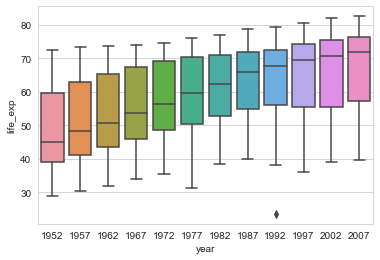

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(x = 'year', y = 'life_exp', data = Gapminder)

## **Q7: Which continent has the lowest life expectancy in 2007?**

<AxesSubplot:xlabel='continent', ylabel='life_exp'>

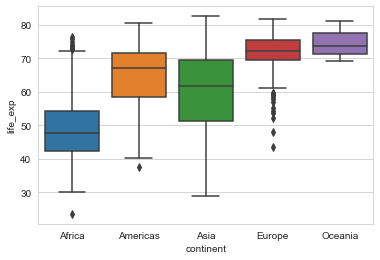

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(x = 'continent', y = 'life_exp', data = Gapminder)

## **Q8: What was the average life expectancy, GDP and gdp per capita in 2007?**

In [ ]:
Gapminder_2007.describe() # As there are multiple questions, I am using describe function.

,year,population,life_exp,gdp_cap,GDP
count,142.0,1.420000e+02,142.000000,142.000000,1.420000e+02
mean,2007.0,4.402122e+07,67.007423,11680.071820,4.092207e+11
std,0.0,1.476214e+08,12.073021,12859.937337,1.311852e+12
min,2007.0,1.995790e+05,39.613000,277.551859,3.190141e+08
25%,2007.0,4.508034e+06,57.160250,1624.842248,1.743849e+10
50%,2007.0,1.051753e+07,71.935500,6124.371108,5.786906e+10
75%,2007.0,3.121004e+07,76.413250,18008.835640,2.759600e+11
max,2007.0,1.318683e+09,82.603000,49357.190170,1.293446e+13


## **Q9: Is there any relationship between life expectancy and gdp per capita? Please show each data point by continent.**

Text(0, 0.5, 'Life Expectancy [in years]')

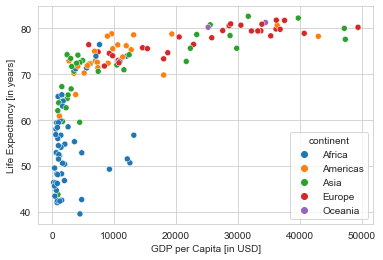

In [ ]:
sns.scatterplot(x="gdp_cap",
                    y="life_exp",
                    hue="continent",
                    data=Gapminder_2007)
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')

## **Q10: What can be done to see the relationship better between life expectancy and gdp percapita?**

Text(0, 0.5, 'Life Expectancy [in years]')

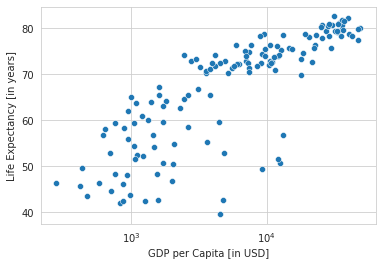

In [ ]:
# We are converting gdp_cap column into log scale
sns.scatterplot(x="gdp_cap",
                    y="life_exp",
                    data=Gapminder_2007)
plt.xscale('log') # converting x scale into log
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')

Adding more information make plot more meaningful.

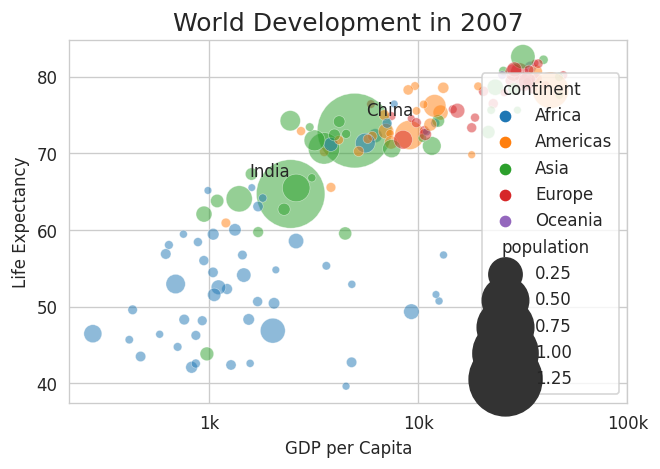

In [ ]:
# Increase the graph size
plt.figure(dpi=120)


sns.scatterplot(data=Gapminder_2007, x="gdp_cap", y="life_exp", hue = "continent", size="population", alpha=0.5, sizes=(20, 2000))
plt.grid(True)
plt.xscale('log')
plt.xlabel('GDP per Capita', fontsize = 10)
plt.ylabel('Life Expectancy', fontsize = 10)
plt.title('World Development in 2007', fontsize = 15)
plt.xticks([1000, 10000, 100000],['1k', '10k', '100k'])
#Add description to the biggest countries
plt.text(1550, 67, 'India')
plt.text(5650, 75, 'China')
plt.show()
plt.show()

## **Q11: What is the trend of life expectancy in India from 1952 - 2007?**

In [ ]:
# Subsetting India first
Gapminder_India = Gapminder[Gapminder["country"] == 'India']

In [ ]:
# Exploring new variable
Gapminder_India.head()

,country,year,population,continent,life_exp,gdp_cap
696,India,1952,372000000,Asia,37.373,546.565749
697,India,1957,409000000,Asia,40.249,590.061996
698,India,1962,454000000,Asia,43.605,658.347151
699,India,1967,506000000,Asia,47.193,700.770611
700,India,1972,567000000,Asia,50.651,724.032527


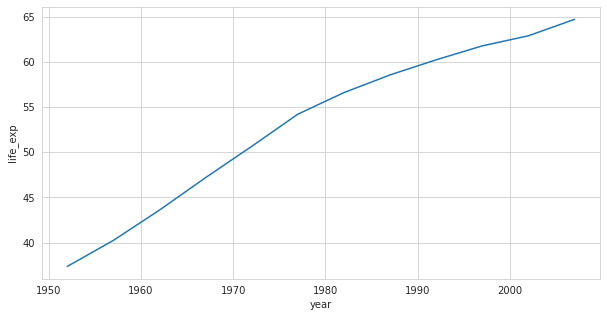

In [ ]:
# Creating line plot to see the trend in life expectency
plt.figure(figsize = (10,5))
sns.lineplot(x = 'year', y = 'life_exp',data = Gapminder_India)

## **Q12: What is the trend of GDP per capita in India from 1952 - 2007?**

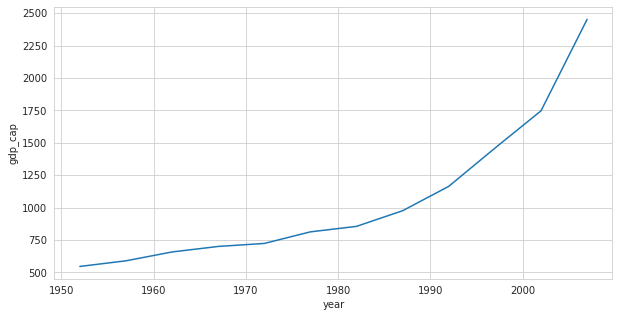

In [ ]:
plt.figure(figsize = (10,5))
sns.lineplot(x = 'year', y = 'gdp_cap',data = Gapminder_India)

## **Q13: What is the median age of each continent by year?**

In [ ]:
Gapminder_gb_year_cont = Gapminder.groupby(['year', 'continent'])['life_exp'].median()
Gapminder_gb_year_cont

year  continent
1952  Africa       38.8330
      Americas     54.7450
      Asia         44.8690
      Europe       65.9000
      Oceania      69.2550
1957  Africa       40.5925
      Americas     56.0740
      Asia         48.2840
      Europe       67.6500
      Oceania      70.2950
1962  Africa       42.6305
      Americas     58.2990
      Asia         49.3250
      Europe       69.5250
      Oceania      71.0850
1967  Africa       44.6985
      Americas     60.5230
      Asia         53.6550
      Europe       70.6100
      Oceania      71.3100
1972  Africa       47.0315
      Americas     63.4410
      Asia         56.9500
      Europe       70.8850
      Oceania      71.9100
1977  Africa       49.2725
      Americas     66.3530
      Asia         60.7650
      Europe       72.3350
      Oceania      72.8550
1982  Africa       50.7560
      Americas     67.4050
      Asia         63.7390
      Europe       73.4900
      Oceania      74.2900
1987  Africa       51.6395
      Americ

Median value of each continent by year is provided in above mentioned table.